## Задание 1

Напишите декоратор @debug, который бы позволял бы выводить отладочную инфорацию о вызове функции.

Не забудьте, что имя и вовращаемое значение обернутой в декоратор функции дожны совпадать с именем и возвращаемым значением функции без декоратора.

*Подсказка*: в отладочной информации при печати стоит использовать repr, а не str. Для этого при форматировании строки стоит использовать специальный флаг `!r`. Также печать стоит делать в поток stderr.

```python
print(f"{value!r}", file=sys.stderr)
```

In [291]:
import sys
import time
import functools

def debug(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f'Calling {func.__name__}(', file=sys.stderr, end='')
        print(', '.join(repr(i) for i in args), file=sys.stderr, end='')
        print(', ', file=sys.stderr, end='')
        print(', '.join(f'{i}={kwargs[i]!r}' for i in kwargs), file=sys.stderr, end='')
        print(')', file=sys.stderr)
        tsp = time.time()
        value = func(*args, **kwargs)
        t_val = time.time() - tsp
        print(f'Function "{func.__name__}" elapsed in {("%.2f" % t_val)}. Return value: {value!r}', file=sys.stderr)
        return value
    return wrapper

In [292]:
@debug
def func(rvalue, t_sleep=0.5):
    time.sleep(t_sleep)
    return rvalue

In [293]:
func(12, t_sleep=2)

Calling func(12, t_sleep=2)
Function "func" elapsed in 2.00. Return value: 12


12

In [3]:
func(12, t_sleep=2)

Calling func(12, t_sleep=2)
Function "func" elapsed in 2.00. Return value: 12


12

## Задание 2

Напишите батч-итератор, который бы позволял считывать изображения из заданной директории батчами. Иными словами нужно считывать частями и не хранить их все в памяти. Итератор должен иметь возможность выдавать изображения в перемешанном (случайном) порядке.

*Подсказка:*
Получить все имена файлов в директории можно, например, так:
```python
_, _, filenames = next(os.walk(path))
```
Считать изображение так:
```python
image = Image.open(filename)
```

In [ ]:
os.walk()

In [294]:
import os
import random

from PIL import Image

class BatchIterator:
    def __init__(self, path, size, shuffle=False):
        self.path=path
        self.size=size
        self.files = os.listdir(path)
        if shuffle:
            random.shuffle(self.files)
        else:
            self.files = sorted(self.files)
        self.__current = 0
        self.__max = len(path) - 1
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.__current >= self.__max:
            raise StopIteration()
        batch = []
        size = max(self.size, self.__max - self.__current)
        for file in self.files[self.__current:self.__current + size]:
            batch.append(Image.open(os.path.join(self.path, file)))
        return batch

In [295]:
it = BatchIterator('images', size=10)

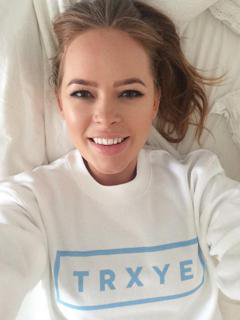

In [296]:
next(it)[0]

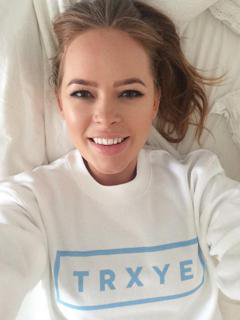

In [6]:
next(it)[0]

In [297]:
next(it)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D5390>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9210>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9410>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9B10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9D90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9310>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D56D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9FD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9110>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x1298D9ED0>]

In [7]:
next(it)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F240>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F1D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F2B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F320>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F390>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F400>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F470>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F4E0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F550>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FEF5432F5C0>]

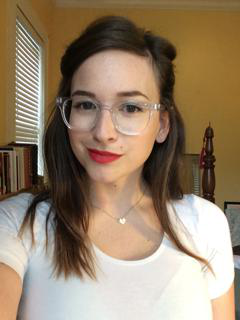

In [299]:
for i, image in enumerate(BatchIterator('images', size=5, shuffle=True)):
    if i == 5:
        break
        
image[0]

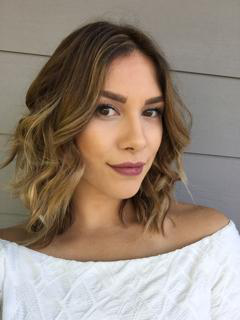

In [8]:
for i, image in enumerate(BatchIterator('images', size=5, shuffle=True)):
    if i == 5:
        break
        
image[0]

---

На платформе Delivery Club рестораны с быстрой скоростью доставки (готовка блюда + доставка блюда курьером до клиента), как правило - это рестораны, которые пользуются наибольшей популярность среди пользователей и получают наивысшую оценку (5 баллов).

Дан датасет **quality_restaurants.csv**, который преставляет из себя выборку с характеристиками некоторых ресторанов платформы DC. 

*avg_cook_time* - среднее время готовки ресторана, 

*avg_rest_toclient_time* - среднее время доставки блюда курьером ресторана до клиента, 

*rating* - бальная оценка ресторана (средний пользовательский рейтинг).

### Задание 3

Оценить корреляцию между средним временем готовки и средним временем доставки между всеми ресторанами платформы.

*Примечание*: в задаче использовать корреляцию Спирмена.

In [300]:
import pandas as pd
from scipy import stats

In [301]:
df = pd.read_csv('files/quality_restaurants.csv')
df.head()

,avg_cook_time,avg_rest_toclient_time,rating
0,14.567977,18.829249,5
1,2.663857,2.358426,3
2,11.066652,13.000000,1
3,14.843242,12.670241,5
4,8.097093,21.126678,3


In [302]:
coef = scipy.stats.spearmanr(df['avg_rest_toclient_time'], df['avg_cook_time'])[0]
print(f'Коэффициент корреляции Спирмена: {round(coef, 2)}')

Коэффициент корреляции Спирмена: 0.07


### Задание 4

1. Построить линейную модель зависимости рейтинга ресторана от скорости доставки и скорости приготовления блюд с помощью метода наименьших квадратов.
2. Интерпретировать полученное качество модели (проанализировать остатки модели, значимость модели, значимость используемых фичей и т.д.).
3. Улучшить качество модели (метрика - коэффициент детерминации).

In [283]:
from matplotlib import pyplot as plt
import numpy as np

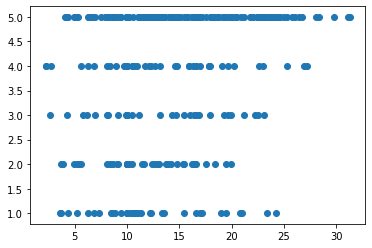

In [303]:
plt.scatter(df['avg_cook_time'], df['rating'])

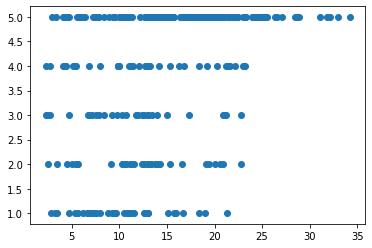

In [304]:
plt.scatter(df['avg_rest_toclient_time'], df['rating'])

In [305]:
import statsmodels.formula.api as smf
model = smf.ols('rating ~ avg_rest_toclient_time + avg_cook_time', data=df)
fitted = model.fit()

In [306]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     37.99
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.03e-15
Time:                        20:44:34   Log-Likelihood:                -509.72
No. Observations:                 300   AIC:                             1025.
Df Residuals:                     297   BIC:                             1037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

Модель получилась с низким коэффициентом детерминации. Prob(Omnibus) равен 0, следовательно, распределение остатков далеко от нормального.

Также на графиках можно видеть отсутствие явной линейной зависимости между фичами и рейтингом

In [309]:
print(f'p-value для значимости avg_cook_time: {fitted.pvalues["avg_cook_time"]}')
print(f'p-value для значимости avg_rest_toclient_time: {fitted.pvalues["avg_rest_toclient_time"]}')

p-value для значимости avg_cook_time: 4.430155378618024e-06
p-value для значимости avg_rest_toclient_time: 5.491348993774203e-12


Попробуем использовать полиноминальные фичи

In [310]:
df['sq_avg_cook_time'] = df['avg_cook_time'] ** 2
df['sq_avg_rest_toclient_time'] = df['avg_rest_toclient_time'] ** 2
df['mult'] = df['avg_cook_time'] * df['avg_rest_toclient_time']

In [311]:
import statsmodels.formula.api as smf
model = smf.ols('rating~avg_rest_toclient_time+avg_cook_time+sq_avg_rest_toclient_time+sq_avg_cook_time+mult', data=df)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     15.98
Date:                Wed, 06 May 2020   Prob (F-statistic):           6.27e-14
Time:                        20:44:57   Log-Likelihood:                -507.84
No. Observations:                 300   AIC:                             1028.
Df Residuals:                     294   BIC:                             1050.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Произошло незначительное увеличение коэффициента детерминации.

### Задание 5

Дана таблица **ORDERS** со следующими столбцами: id (идентификатор заказа), city_id (идентификатор города), user_id (идентификатор клиента).
Также дана таблица **CITIES**, поля - id (идентификатор города), city_name (название города).
Задача - написать SQL-запрос, отвечающий на следующий вопрос: сколько уникальных клиентов выполнили заказ в городах на букву П.

In [ ]:
sql_command="""
SELECT COUNT(distinct user_id) FROM ORDERS WHERE ORDERS.city_id = CITIES.city_id AND LIKE 'П%'
"""